In [ ]:
!pip install --upgrade pip
!pip install ultralytics roboflow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 155.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 128.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 71.3 M

In [ ]:
import numpy as np, pandas as pd, cv2
import ultralytics
from roboflow import Roboflow

print("NumPy:", np.__version__)
print("pandas:", pd.__version__)
print("OpenCV:", cv2.__version__)
print("Ultralytics:", ultralytics.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
NumPy: 2.0.2
pandas: 2.2.2
OpenCV: 4.10.0
Ultralytics: 8.3.169


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="noCkcz2UnLOHQReY2P5i")
project = rf.workspace("arshs-workspace414141").project("dadad-rvg")
version = project.version(5)
dataset = version.download("yolov8")

print("Dataset downloaded to:", dataset.location)


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dadad-rvg-5 in yolov8:: 100%|██████████| 5972/5972 [00:01<00:00, 5535.13it/s]


Dataset downloaded to: /content/dadad-rvg-5


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 batch=16 name=bone_loss_yolov8n


100% 6.25M/6.25M [00:00<00:00, 102MB/s]
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dadad-rvg-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bone_loss_yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

Latest run: runs/detect/bone_loss_yolov8n


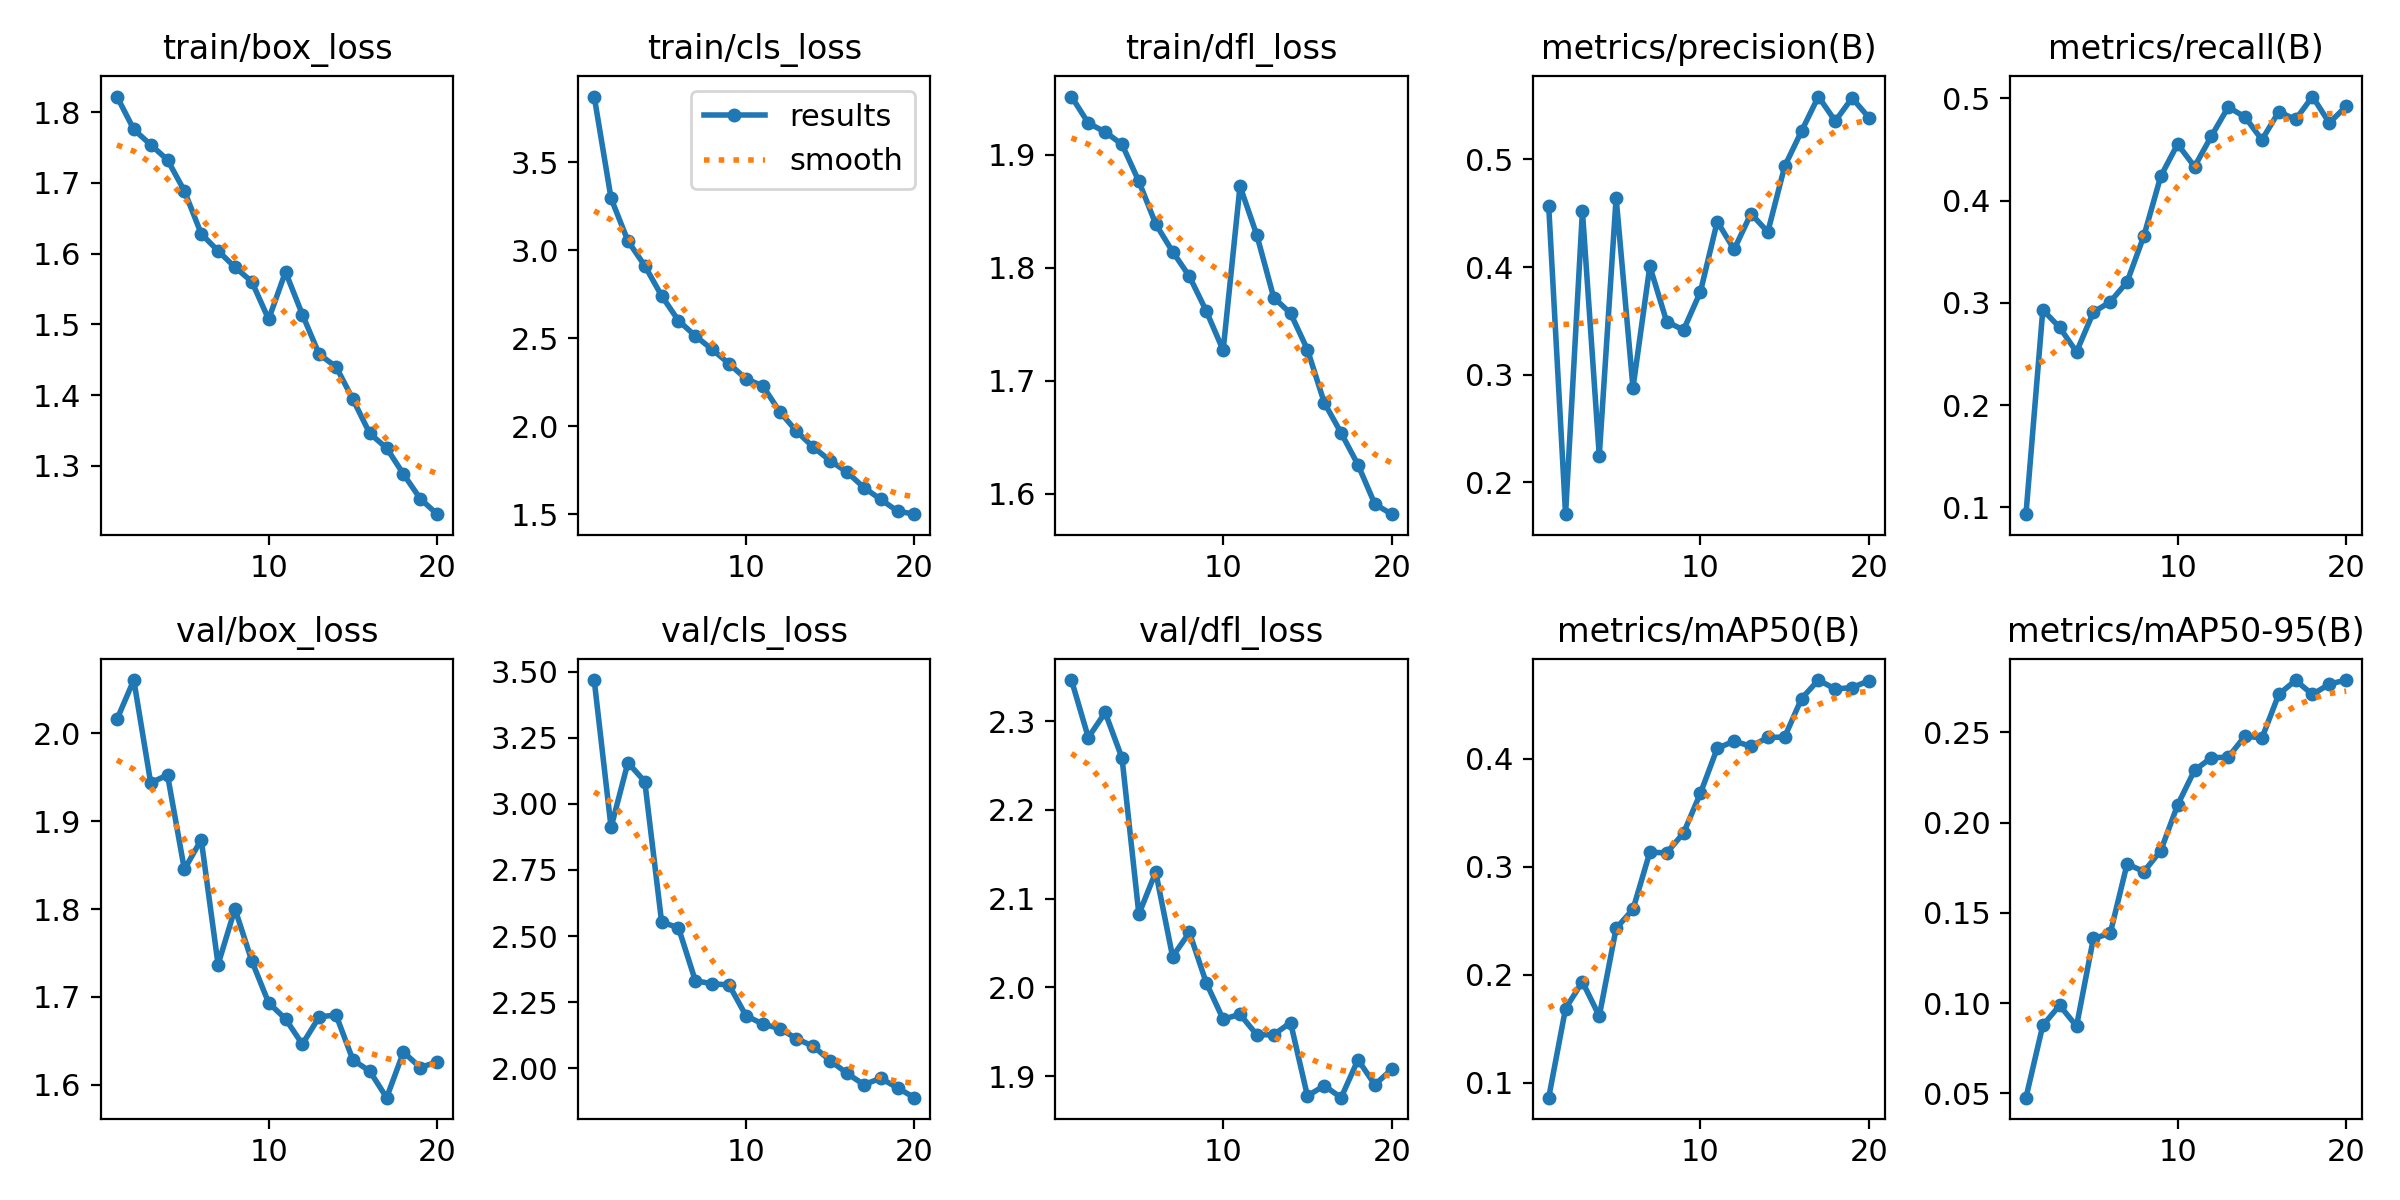

In [ ]:
import glob, os
from IPython.display import Image, display

# Find latest run
runs = sorted(glob.glob('runs/detect/*'), key=os.path.getmtime)
latest_run = runs[-1]
print("Latest run:", latest_run)

# Show training metrics image
results_img = os.path.join(latest_run, "results.png")
if os.path.exists(results_img):
    display(Image(filename=results_img, width=900))


In [ ]:
import pandas as pd
import yaml

# Read final metrics
rcsv = os.path.join(latest_run, "results.csv")
if os.path.exists(rcsv):
    df = pd.read_csv(rcsv)
    print("\nLast epoch metrics:")
    print(df.tail(1).T)

# Read best epoch metrics
ryaml = os.path.join(latest_run, "results.yaml")
if os.path.exists(ryaml):
    with open(ryaml, "r") as f:
        best = yaml.safe_load(f)
    print("\nBest epoch metrics:")
    for k, v in best.items():
        print(f"{k}: {v}")



Last epoch metrics:
                              19
epoch                  20.000000
time                  870.228000
train/box_loss          1.231450
train/cls_loss          1.501530
train/dfl_loss          1.581730
metrics/precision(B)    0.538840
metrics/recall(B)       0.492370
metrics/mAP50(B)        0.472450
metrics/mAP50-95(B)     0.278860
val/box_loss            1.626040
val/cls_loss            1.888600
val/dfl_loss            1.907590
lr/pg0                  0.000046
lr/pg1                  0.000046
lr/pg2                  0.000046


In [ ]:
!yolo task=detect mode=predict model={latest_run}/weights/best.pt source={dataset.location}/valid/images imgsz=640 conf=0.25 save=True name=bone_loss_predictions


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs

image 1/387 /content/dadad-rvg-5/valid/images/011053d715f94a17949b843cacc81c30_png.rf.030a803104000b46a21a208cfb5f016c.jpg: 640x640 1 Bone Loss, 1 Decay, 1 Root Canal Treatment, 9.0ms
image 2/387 /content/dadad-rvg-5/valid/images/01419b4241a744b98e8ba6cbf7480b38_png.rf.e7b7e70be1c7ef2796c46ece91a8d217.jpg: 640x640 2 Bone Losss, 7.4ms
image 3/387 /content/dadad-rvg-5/valid/images/03e3ae56f977950f009940904c6b5bdf_jpg.rf.ff8af6ac3d8f5fae9dd13bfcd30d68fb.jpg: 640x640 1 Implant, 7.4ms
image 4/387 /content/dadad-rvg-5/valid/images/04c106176f2b44dabaafc26b50502b1c_png.rf.f536bd9df121e6e342c7f55c996ede64.jpg: 640x640 2 Bone Losss, 7.4ms
image 5/387 /content/dadad-rvg-5/valid/images/0516914cb42e432cbe13777cd3b42864_png.rf.66473b4675ee25faf2f52c730a761373.jpg: 640x640 2 Bone Losss, 2 Decays, 1 Missing Tooth, 7.3ms
image 6/387 /content

Predicted images: 387


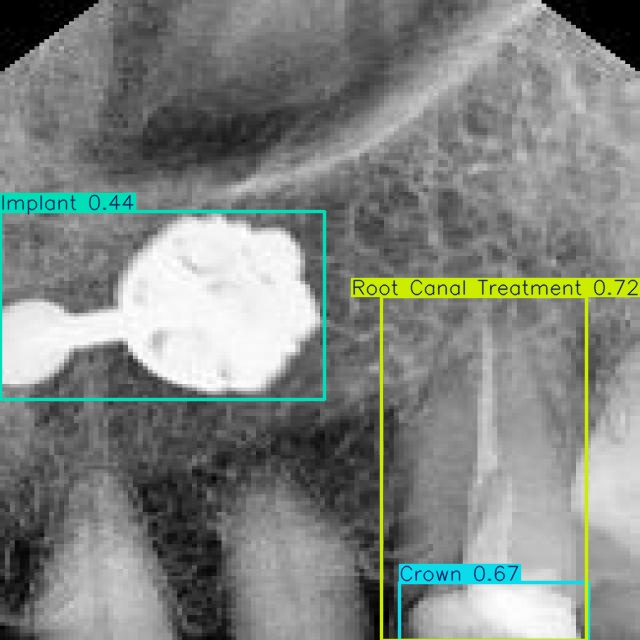

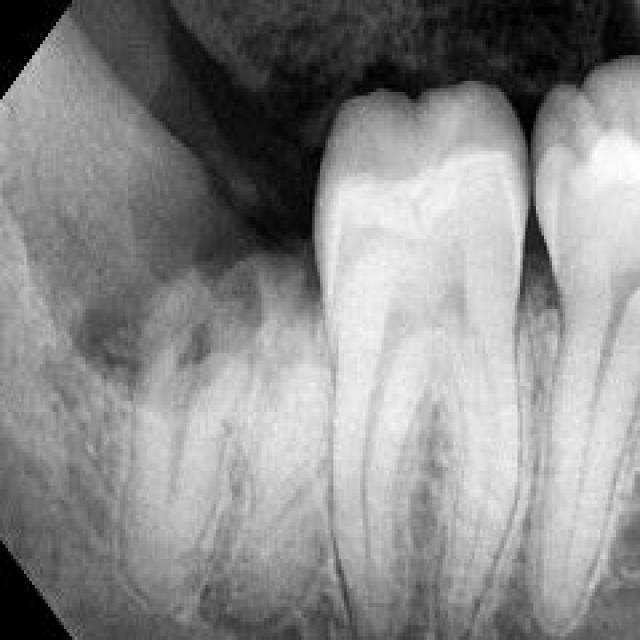

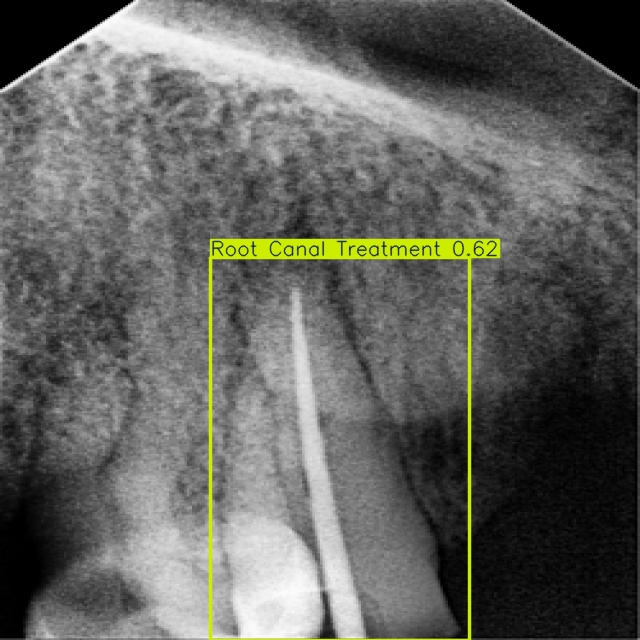

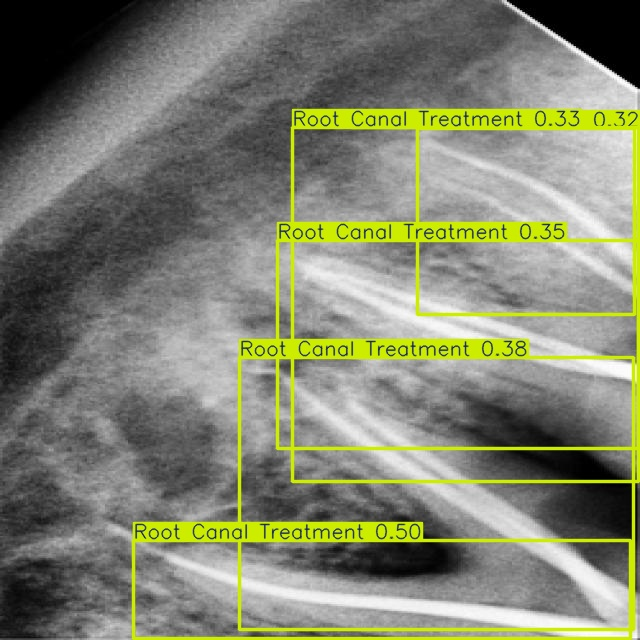

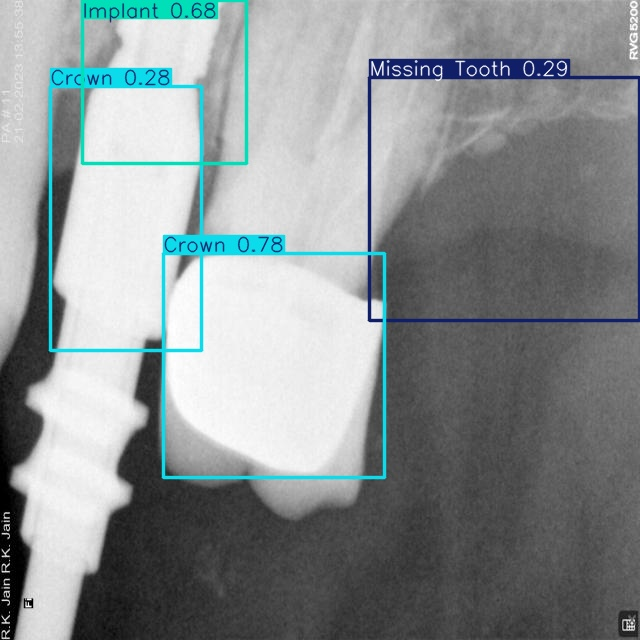

In [8]:
import glob, random
from IPython.display import Image, display

pred_dir = 'runs/detect/bone_loss_predictions'
pred_imgs = glob.glob(pred_dir + "/*.jpg") + glob.glob(pred_dir + "/*.png")
print("Predicted images:", len(pred_imgs))

for img in random.sample(pred_imgs, min(5, len(pred_imgs))):
    display(Image(filename=img, width=700))


In [11]:
import glob, os

# find the newest training run
runs = sorted(glob.glob("runs/detect/*"), key=os.path.getmtime)
latest_run = runs[-1]
print("Latest run:", latest_run)

# list everything inside it
!ls -R {latest_run}


Latest run: runs/detect/bone_loss_predictions
runs/detect/bone_loss_predictions:
011053d715f94a17949b843cacc81c30_png.rf.030a803104000b46a21a208cfb5f016c.jpg
01419b4241a744b98e8ba6cbf7480b38_png.rf.e7b7e70be1c7ef2796c46ece91a8d217.jpg
03e3ae56f977950f009940904c6b5bdf_jpg.rf.ff8af6ac3d8f5fae9dd13bfcd30d68fb.jpg
04c106176f2b44dabaafc26b50502b1c_png.rf.f536bd9df121e6e342c7f55c996ede64.jpg
0516914cb42e432cbe13777cd3b42864_png.rf.66473b4675ee25faf2f52c730a761373.jpg
062961641406479784b935f4e9072e9a_png.rf.4f6643abf3e8e4a72a2cf577a32bc9d9.jpg
0657b99c12b94ec7a699be99c1a87343_png.rf.895cb265fc2cd2cbdc1327d361535b70.jpg
0744b2756c934b4b99adef08f662c67f_png.rf.c5365d66f4d6b9e9d8eb94ee0644d5ec.jpg
08edf459861644f7b5c7133ed0d7efe6_png.rf.0c13b63f756622284a2f4e639b8157d8.jpg
09b0af5cf1724766b5fe839f459ce52b_png.rf.9e4b625c6563dfd6ca5147e9c092c746.jpg
09edeeab83bc4c4a9c3d3b23e94d17e1_png.rf.08ec40dc75cd3688af9524cb5e56790b.jpg
0faeb019db774d0a94dd7242a110cb86_png.rf.a3acbddb9a03012a8741dd636700b49e

In [16]:
!ls runs/detect


bone_loss_predictions  bone_loss_yolov8n


In [17]:
!ls runs/detect/bone_loss_yolov8n/weights


best.pt  last.pt


In [18]:
from google.colab import files
files.download("runs/detect/bone_loss_yolov8n/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
!zip -r predictions.zip runs/detect/bone_loss_predictions
from google.colab import files
files.download("predictions.zip")


  adding: runs/detect/bone_loss_predictions/ (stored 0%)
  adding: runs/detect/bone_loss_predictions/IC20230408_064231_1406t_89667283_jpg.rf.9187b1b232650f1ac4fce9040ccd40b6.jpg (deflated 5%)
  adding: runs/detect/bone_loss_predictions/IS20230410_010029_2544t_87759527_jpg.rf.e90cb3c25c2ecb7b33a989bf7d8cf499.jpg (deflated 8%)
  adding: runs/detect/bone_loss_predictions/cfe7c543252a415dbac051dc524648d5_png.rf.779647b8ce9d429643a7c285cdb7c327.jpg (deflated 6%)
  adding: runs/detect/bone_loss_predictions/IS20230318_232249_4478t_54695913_jpg.rf.3bd82e4ccb9ce8b631a21d8401fa80c6.jpg (deflated 5%)
  adding: runs/detect/bone_loss_predictions/IS20230518_001346_8999t_93296468_jpg.rf.770d0fd01e9507bd63432d68bcc5ceec.jpg (deflated 6%)
  adding: runs/detect/bone_loss_predictions/ca27b44134764382ab7d20e68c5dd6d4_png.rf.2ac3469b20462ece556618ae58993385.jpg (deflated 5%)
  adding: runs/detect/bone_loss_predictions/IS20230504_000156_4741t_23116579_jpg.rf.eeb540e7b6920c9015fd53c4dfb446eb.jpg (deflated 7%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from google.colab import files

files.download("runs/detect/bone_loss_yolov8n/results.png")
files.download("runs/detect/bone_loss_yolov8n/results.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
from google.colab import files
files.download("runs/detect/bone_loss_yolov8n/weights/best.pt")


FileNotFoundError: Cannot find file: runs/detect/bone_loss_yolov8n/weights/best.pt